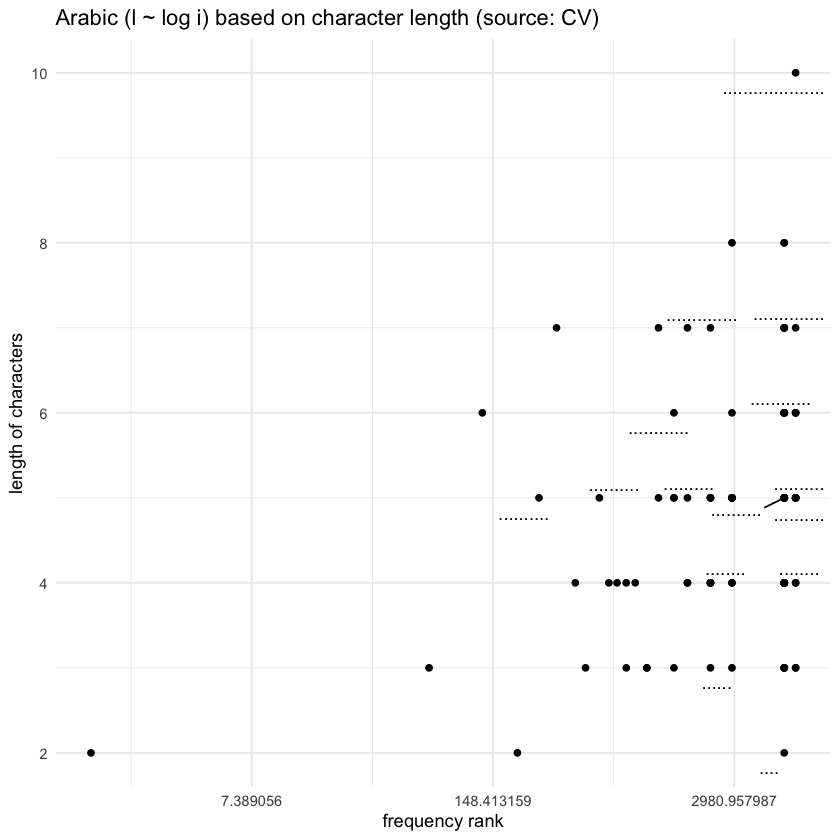

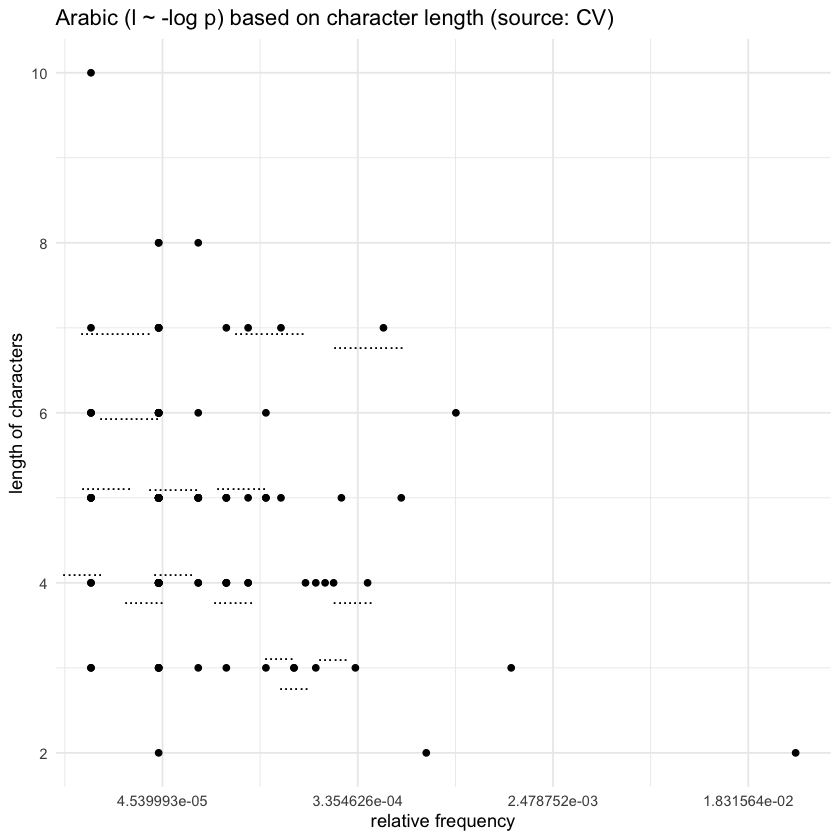

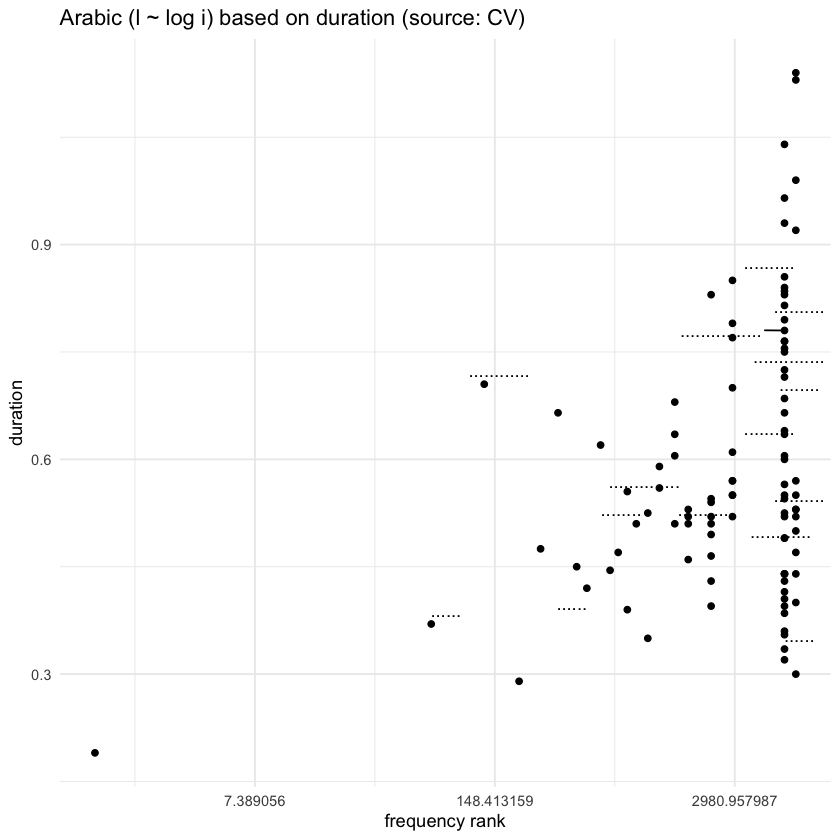

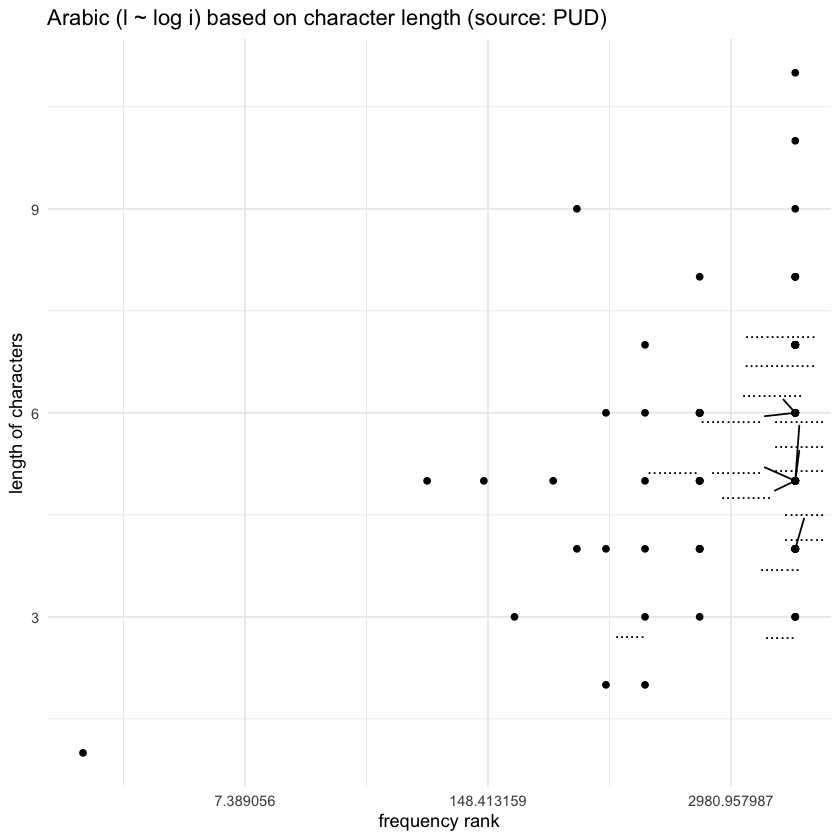

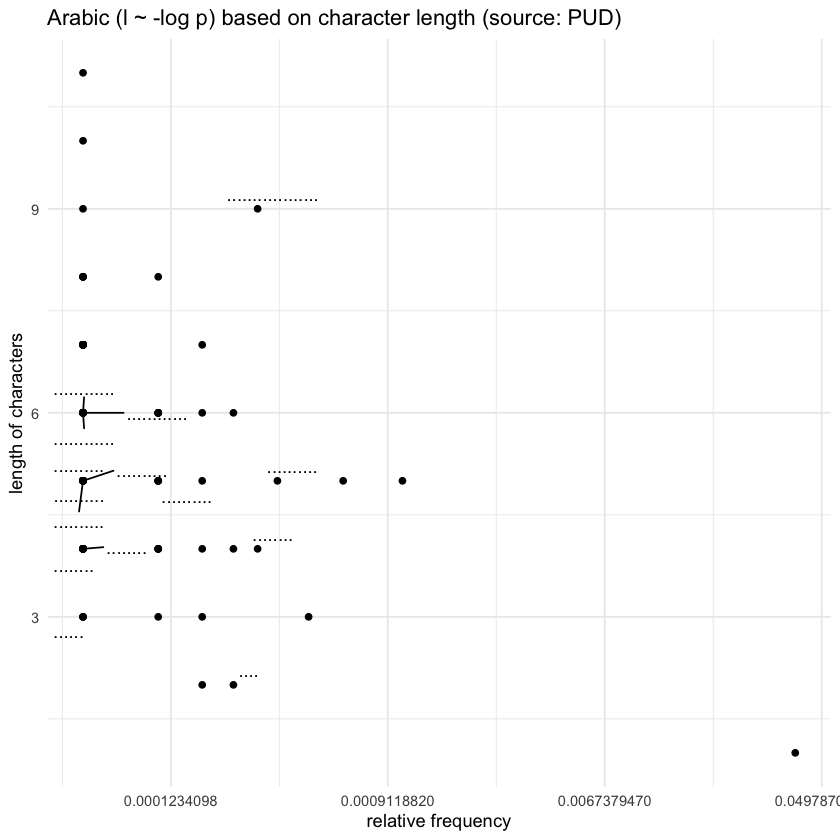

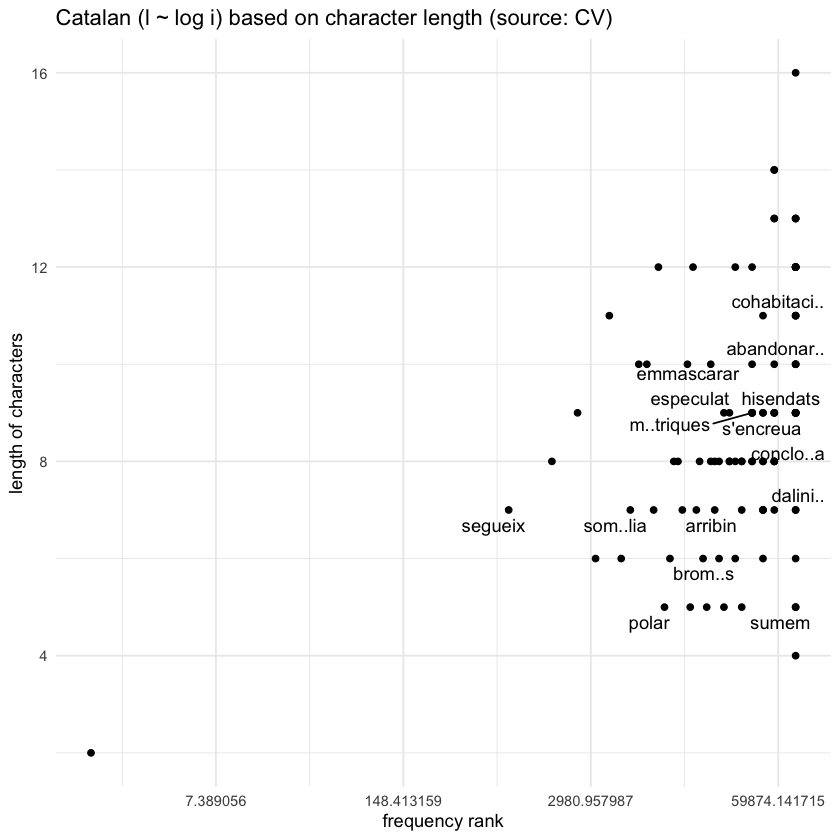

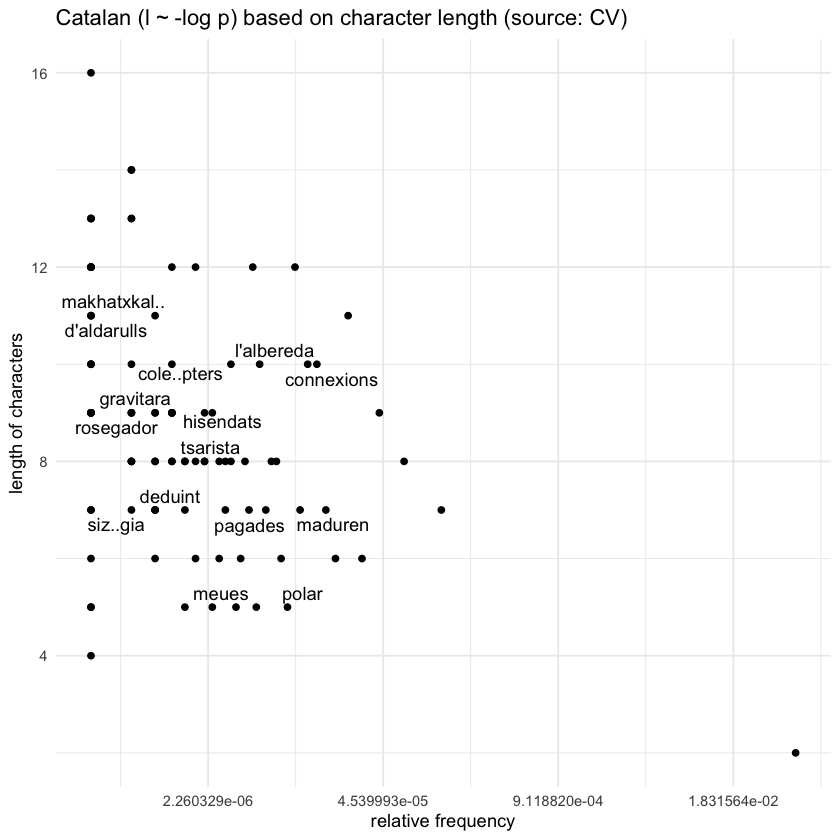

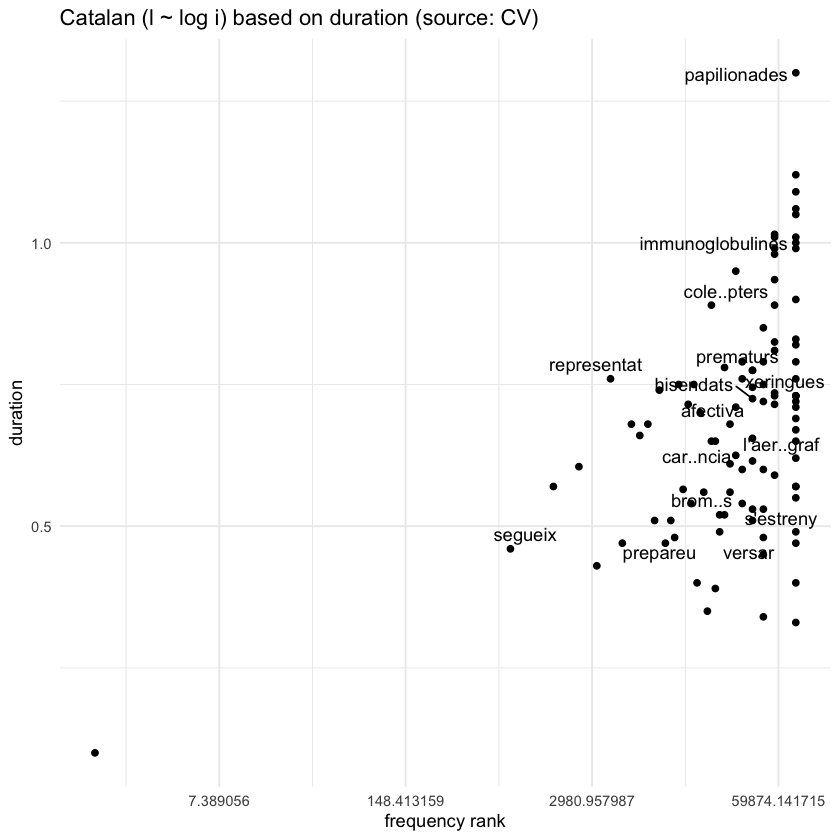

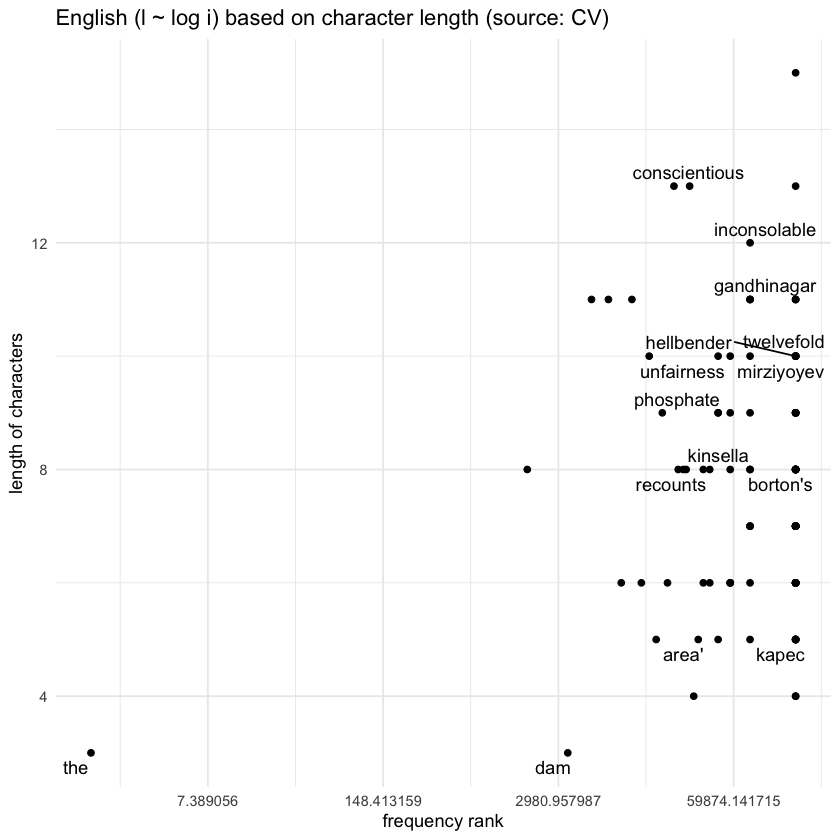

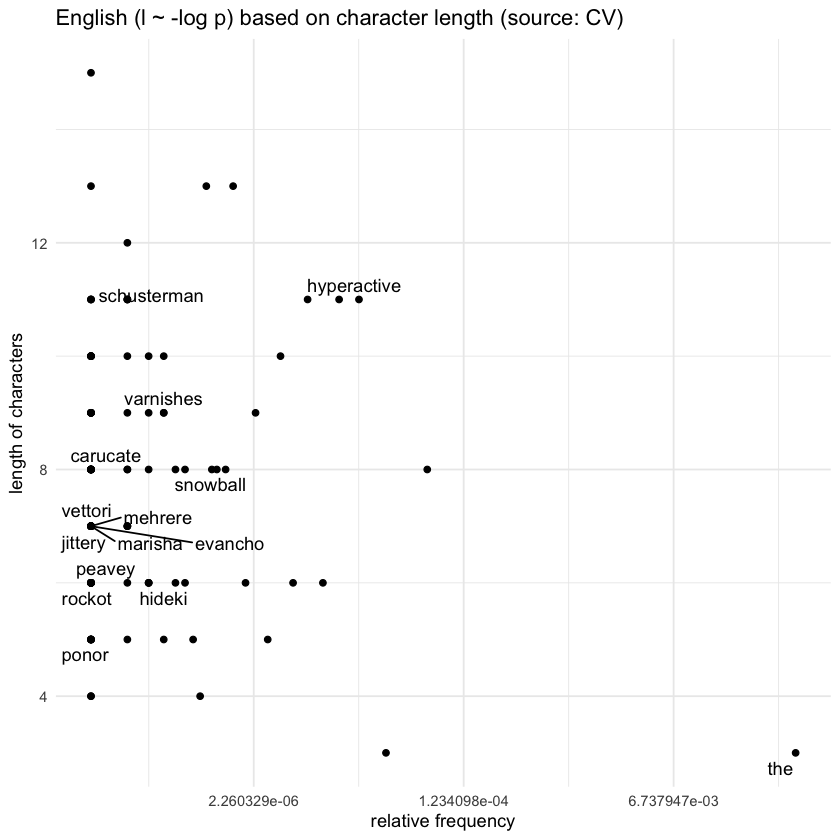

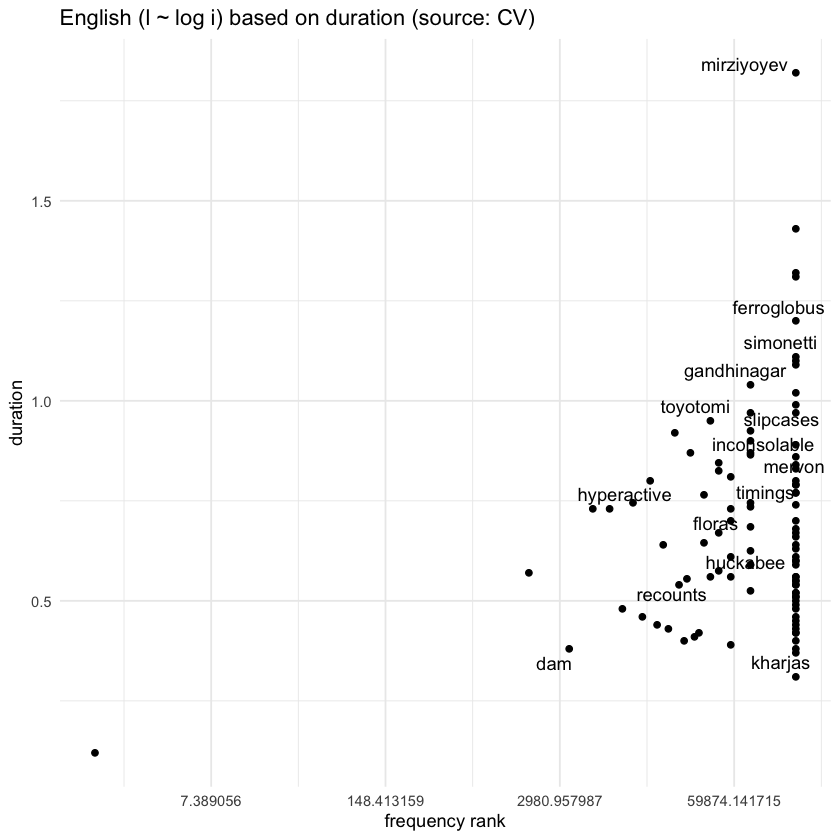

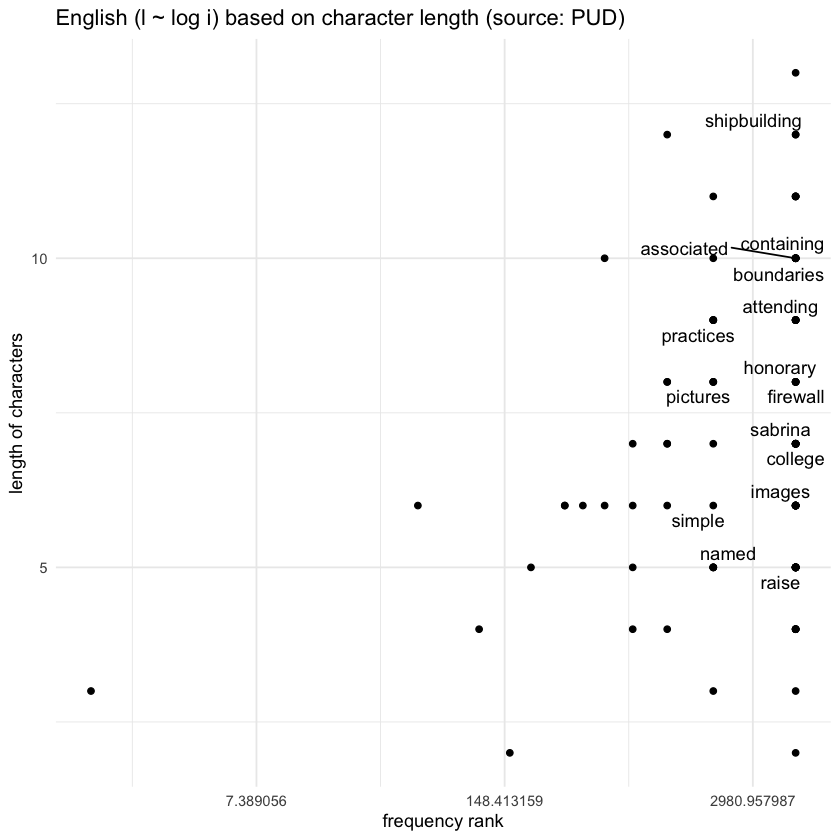

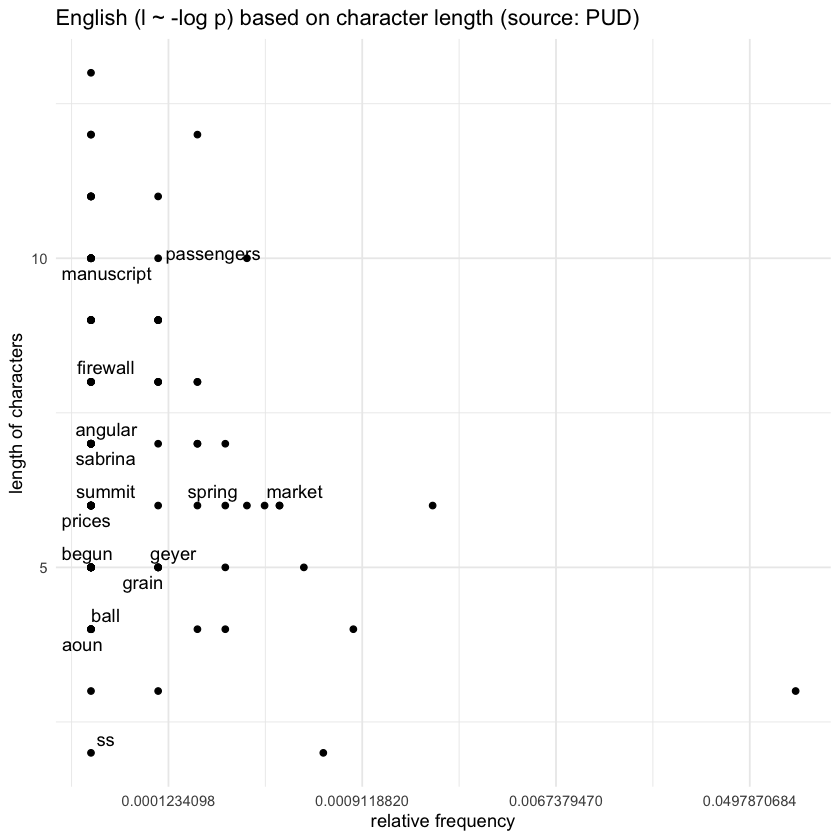

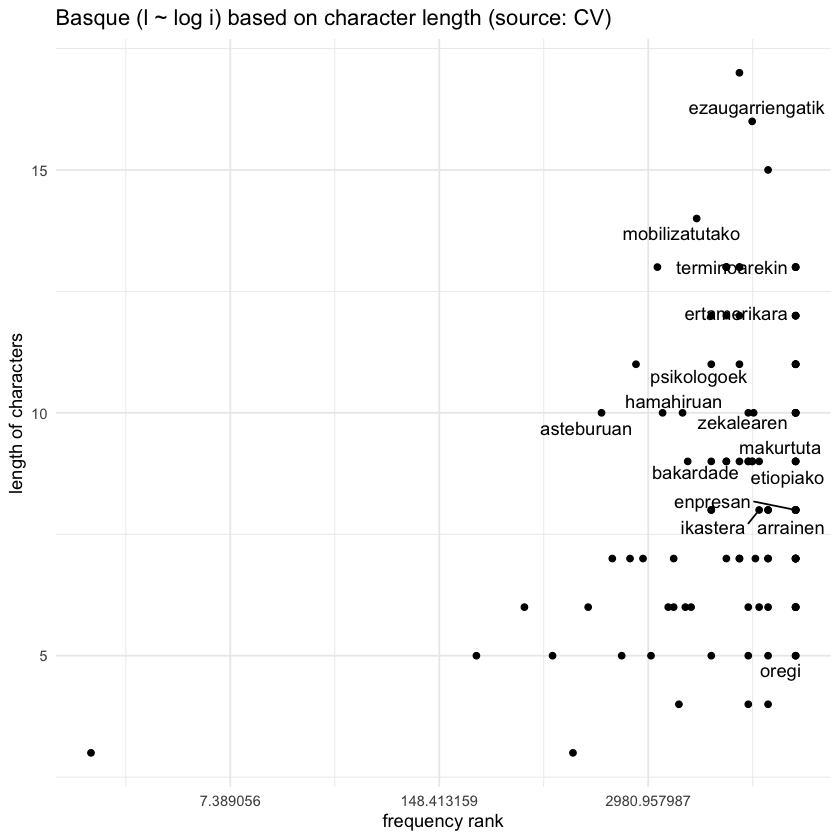

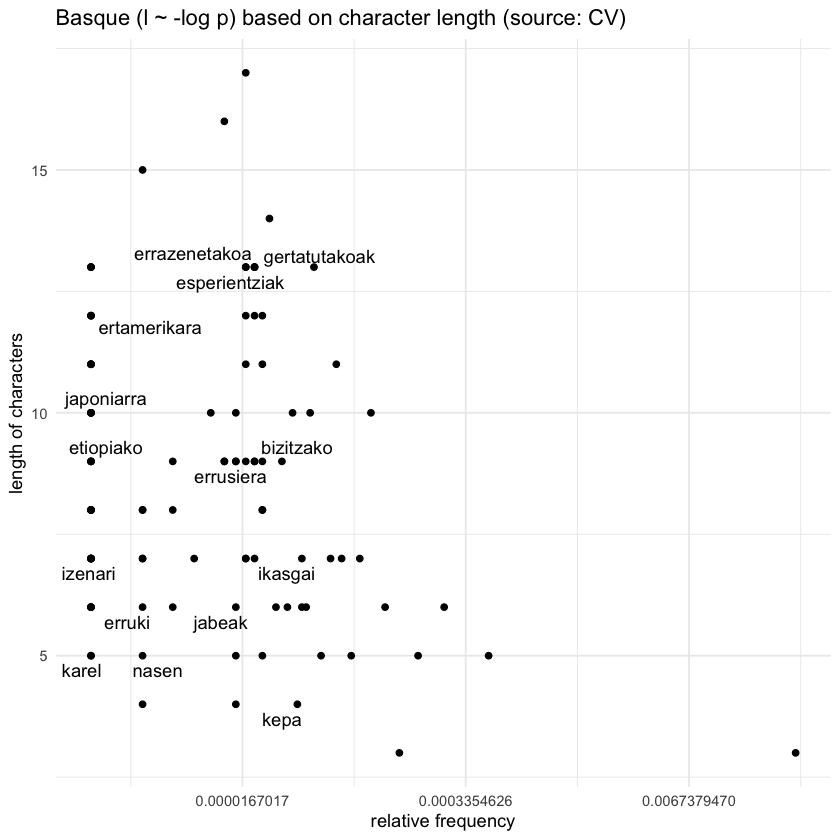

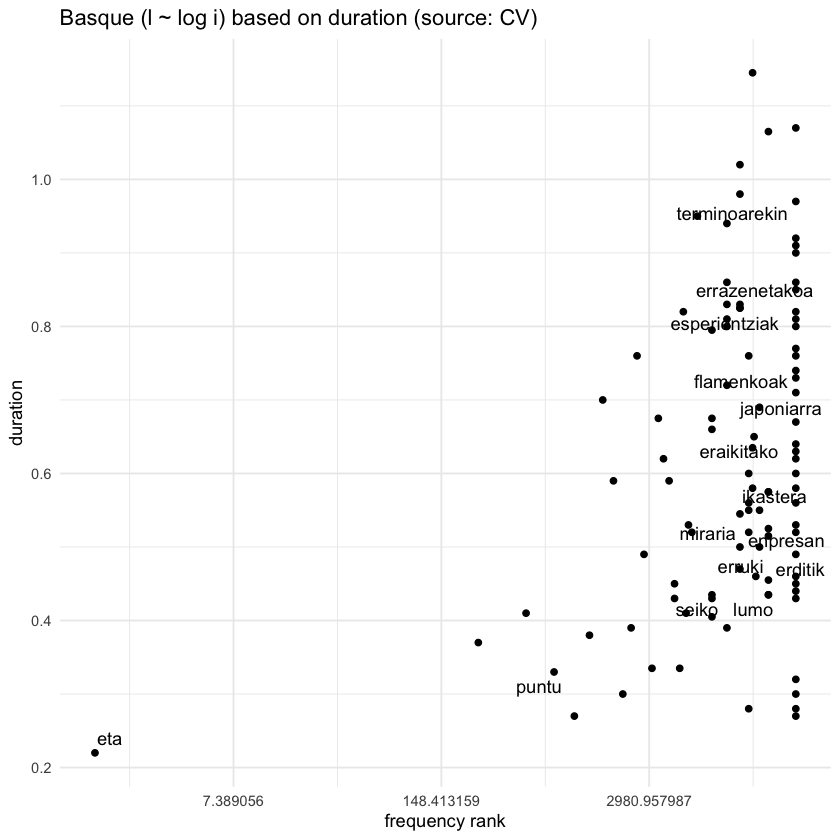

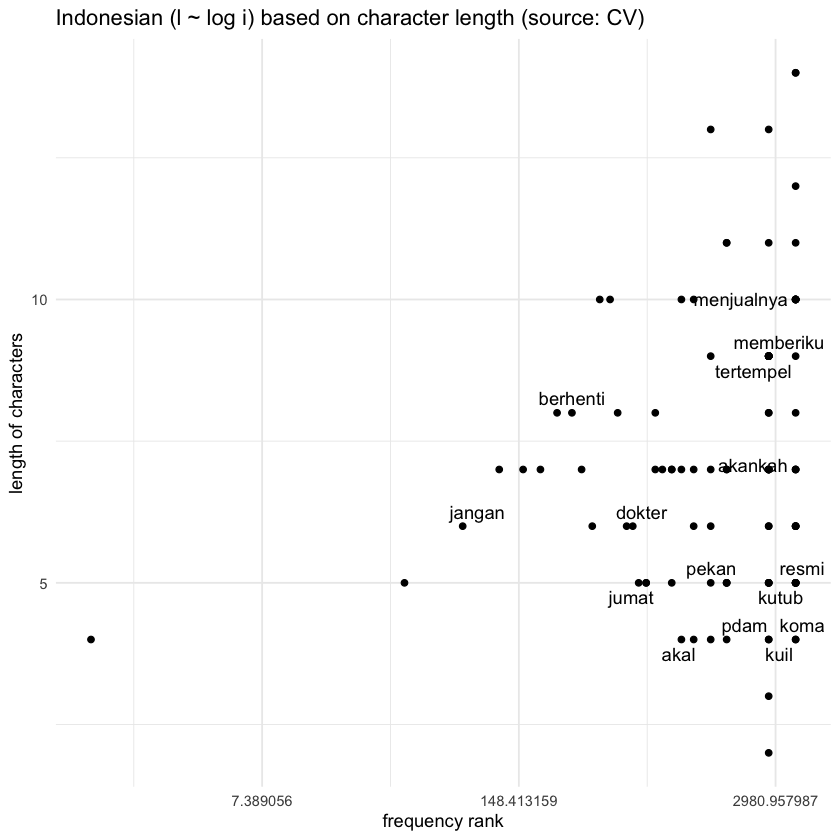

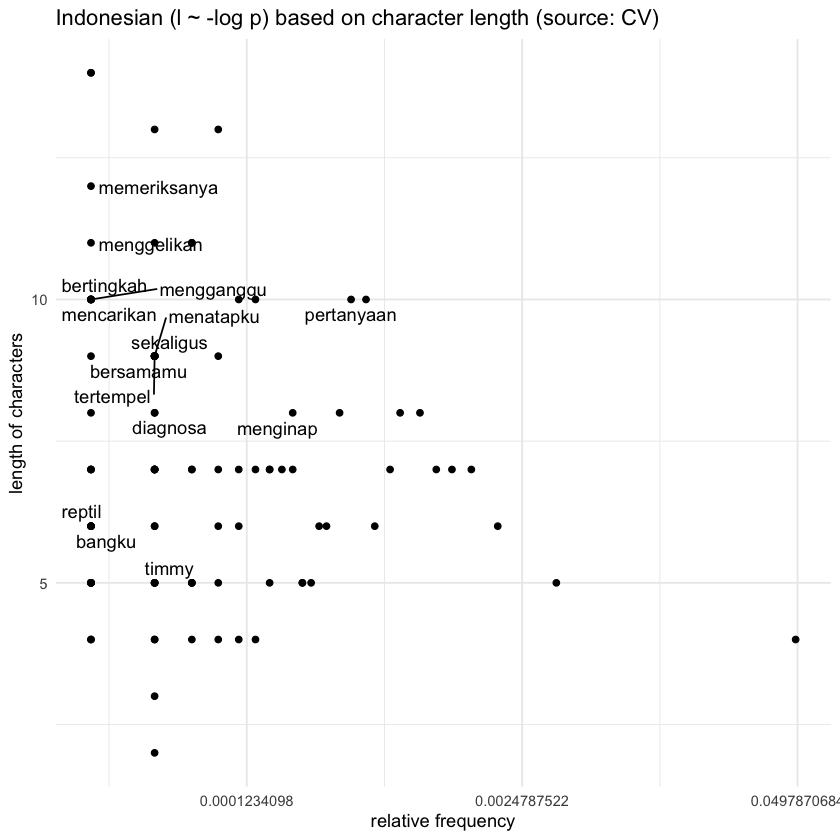

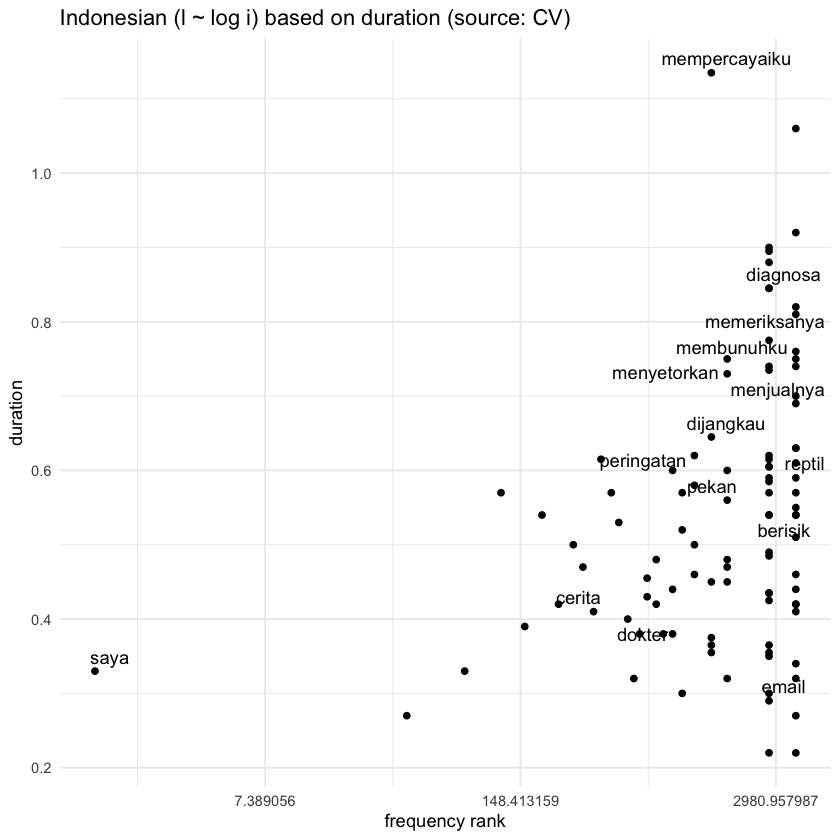

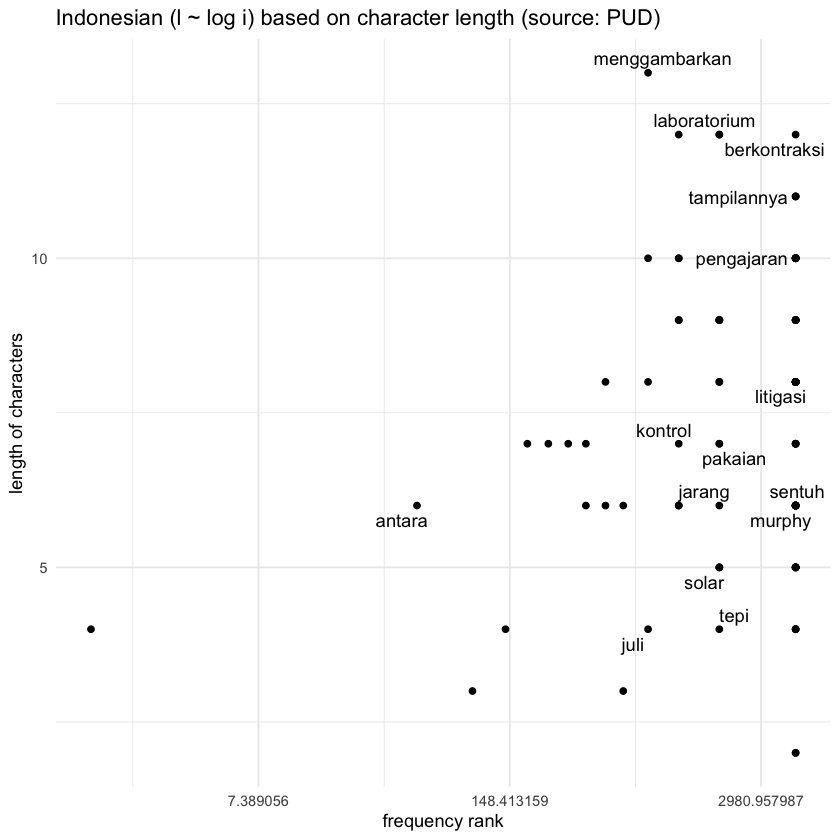

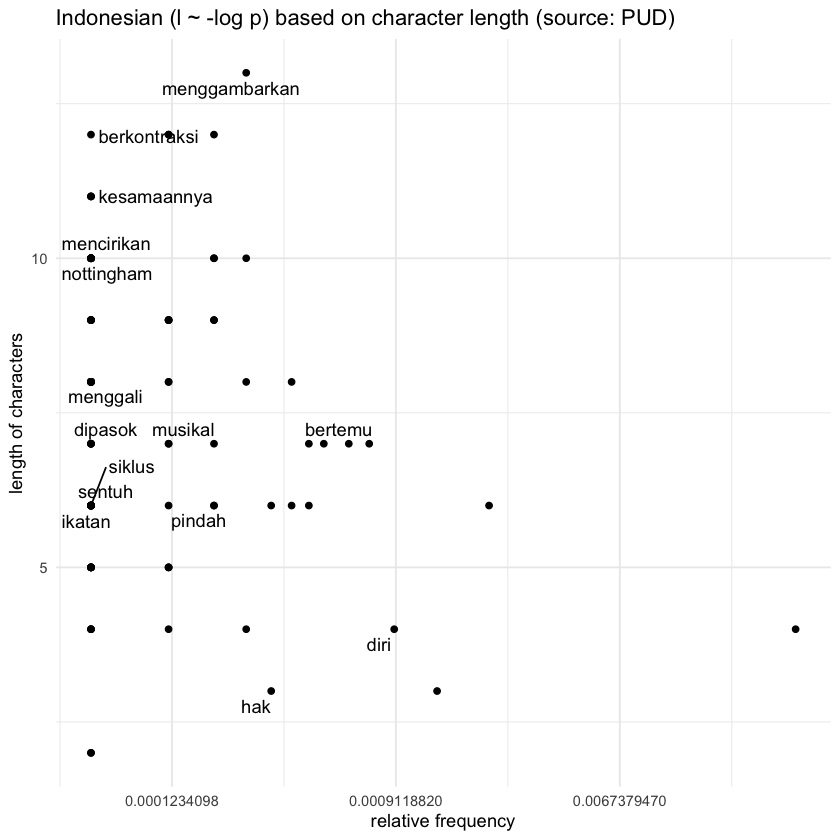

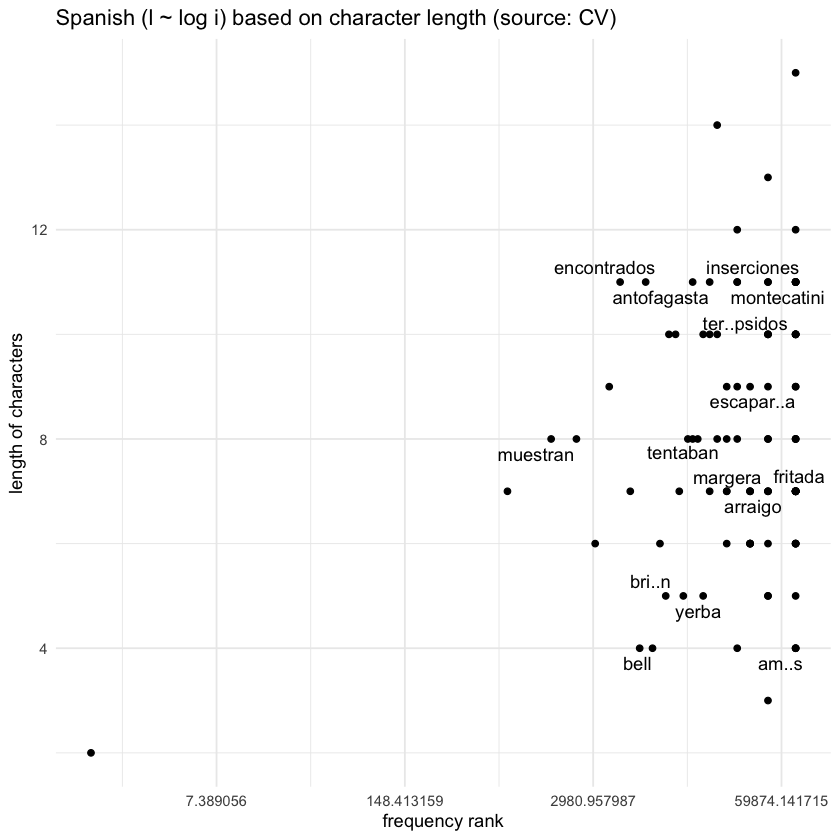

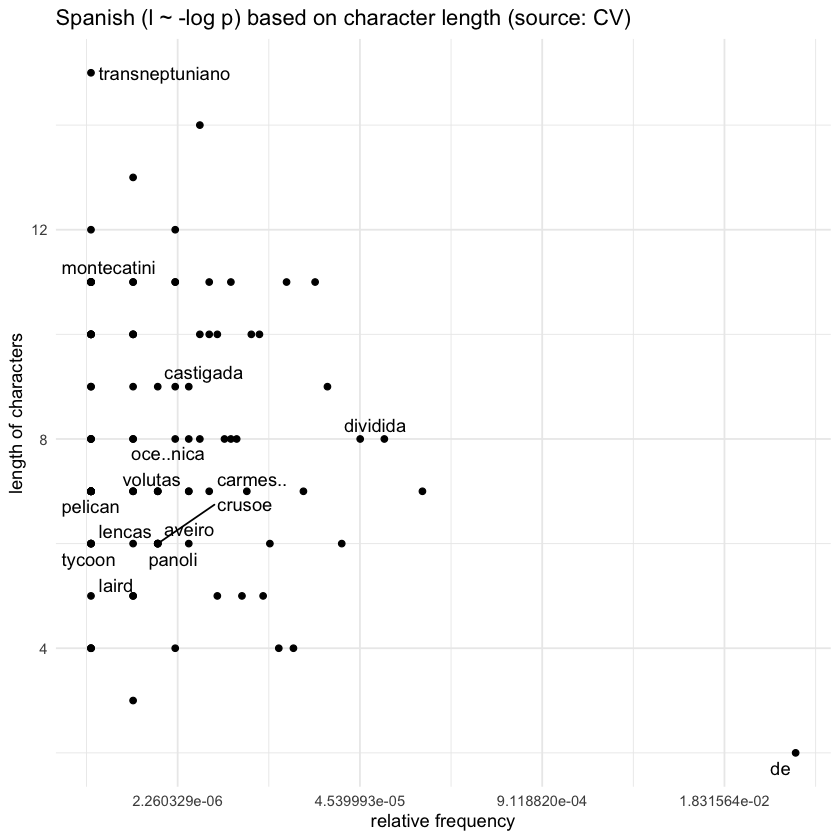

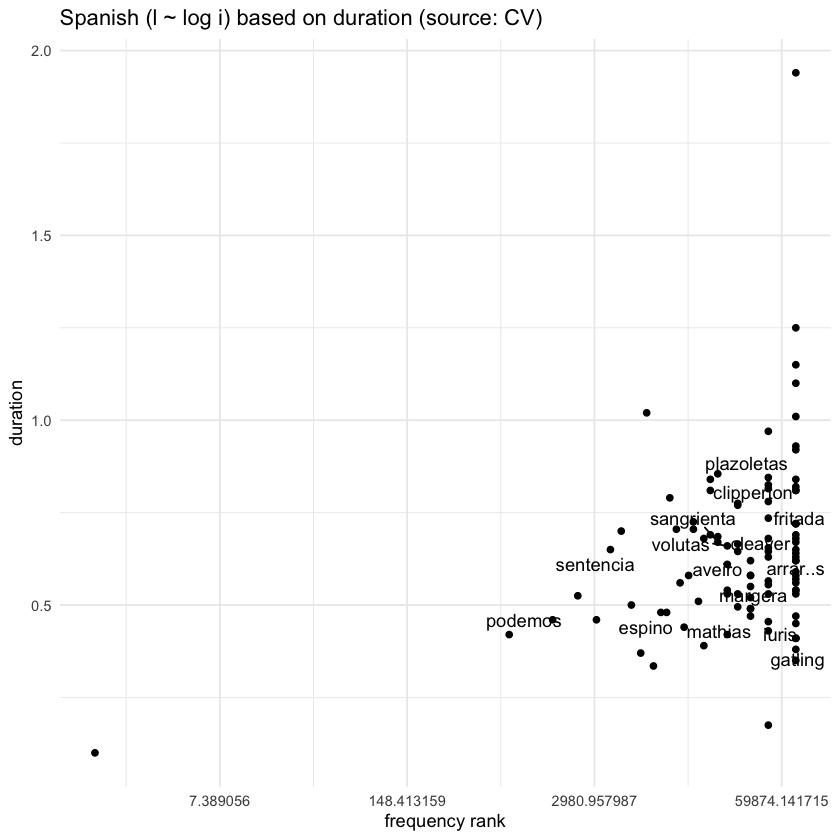

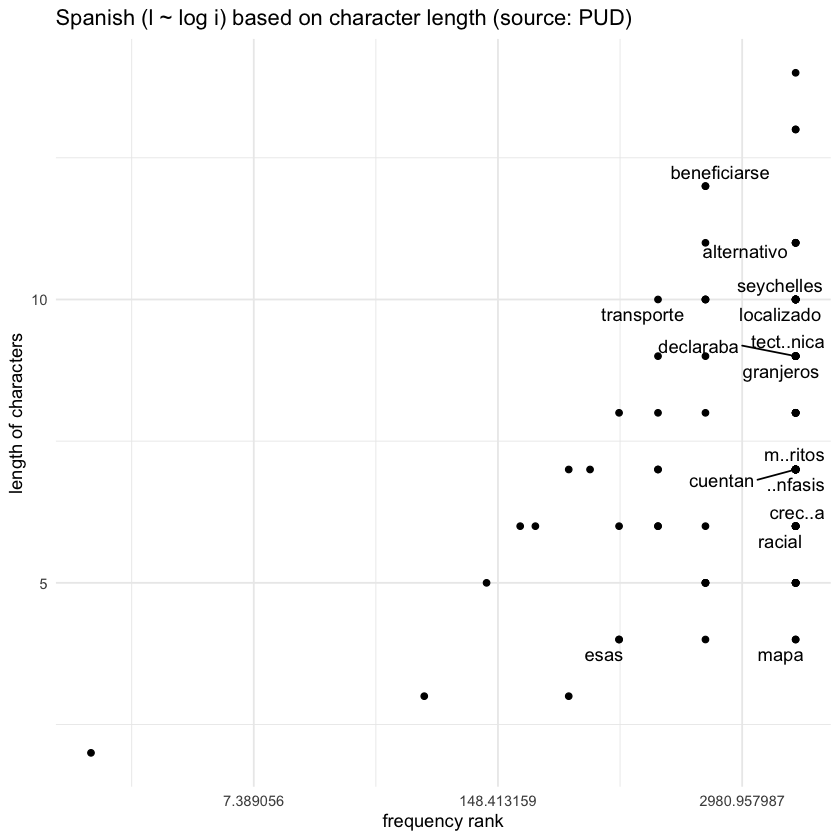

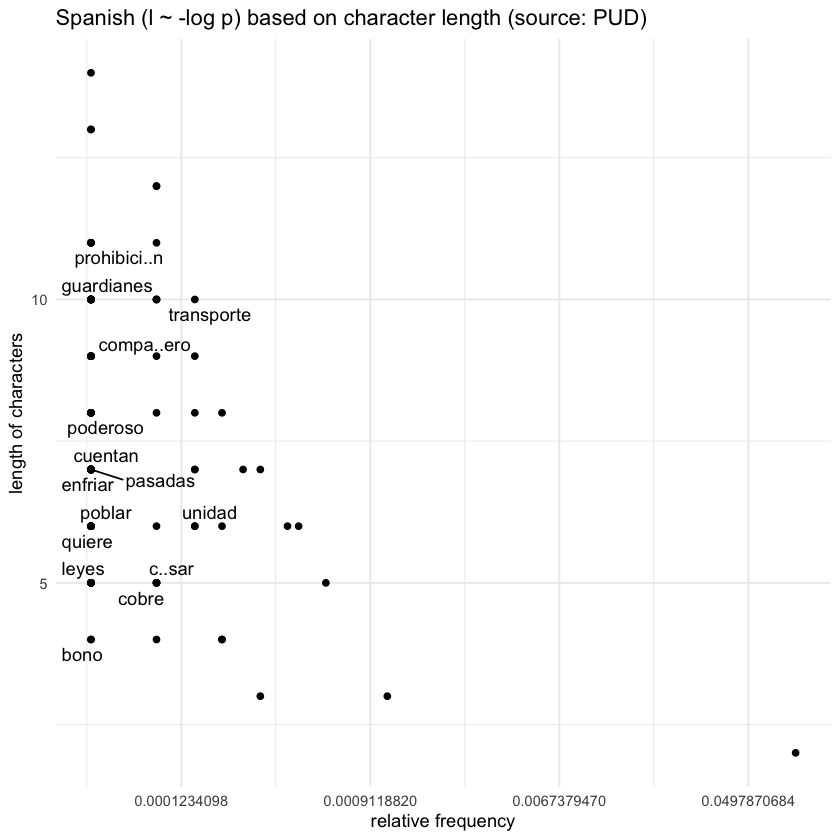

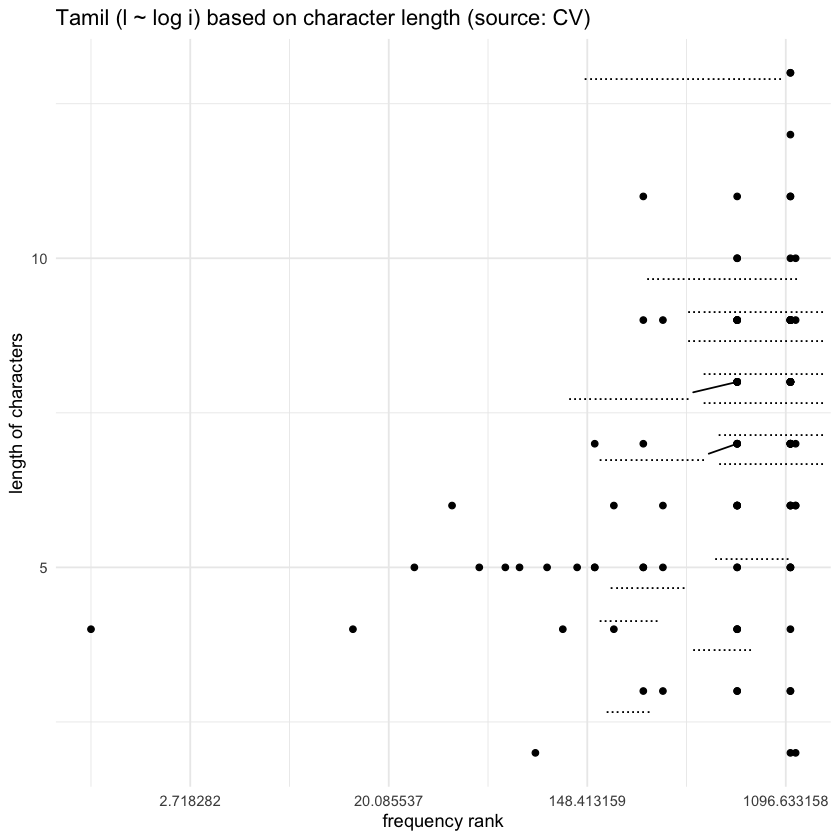

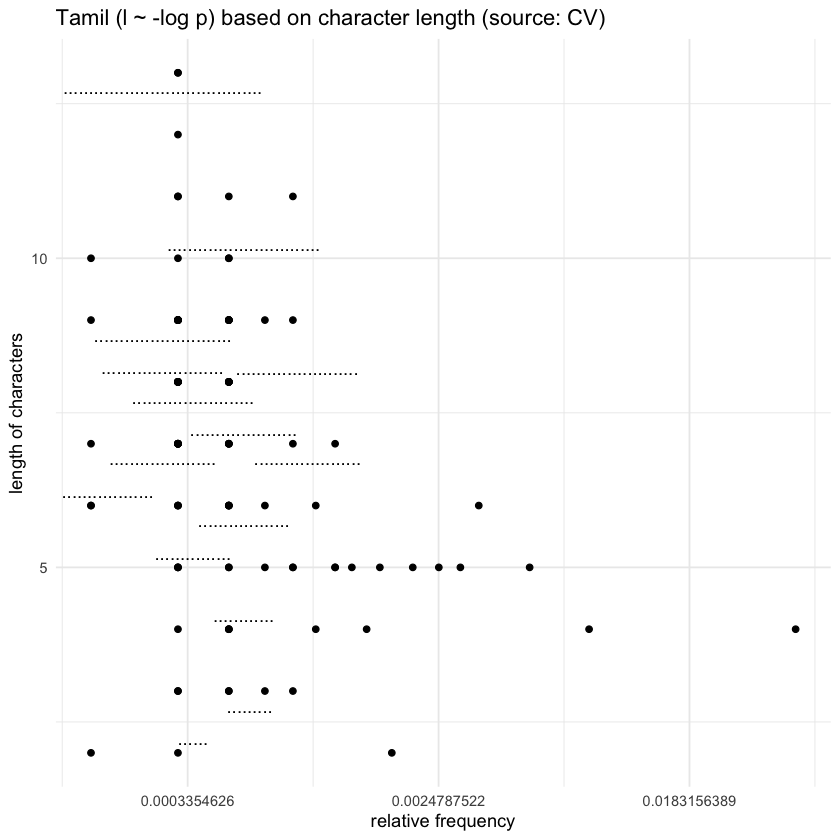

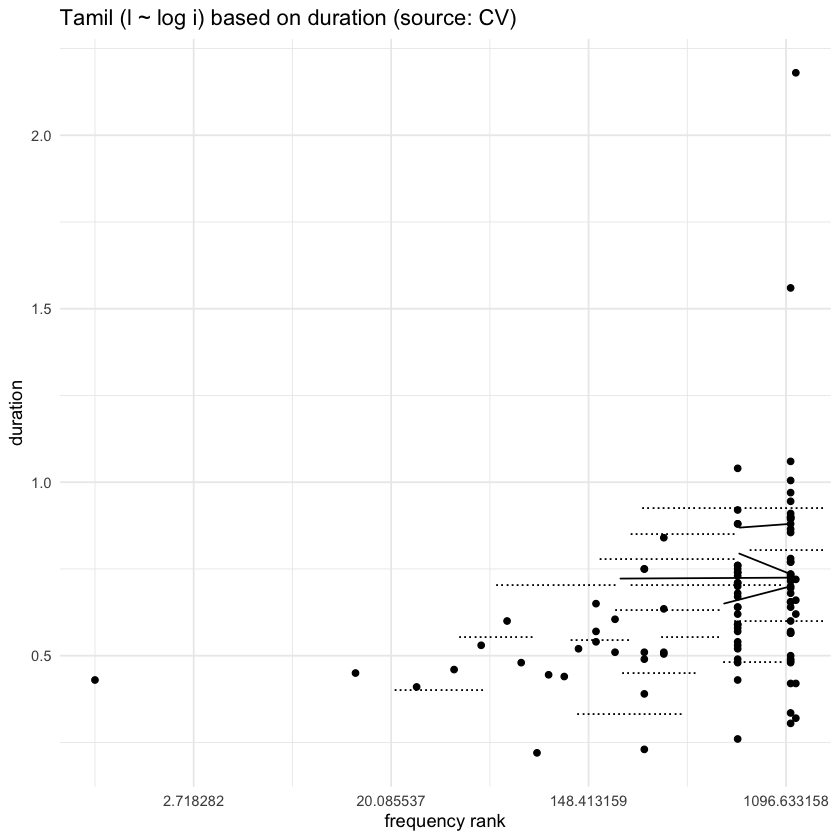

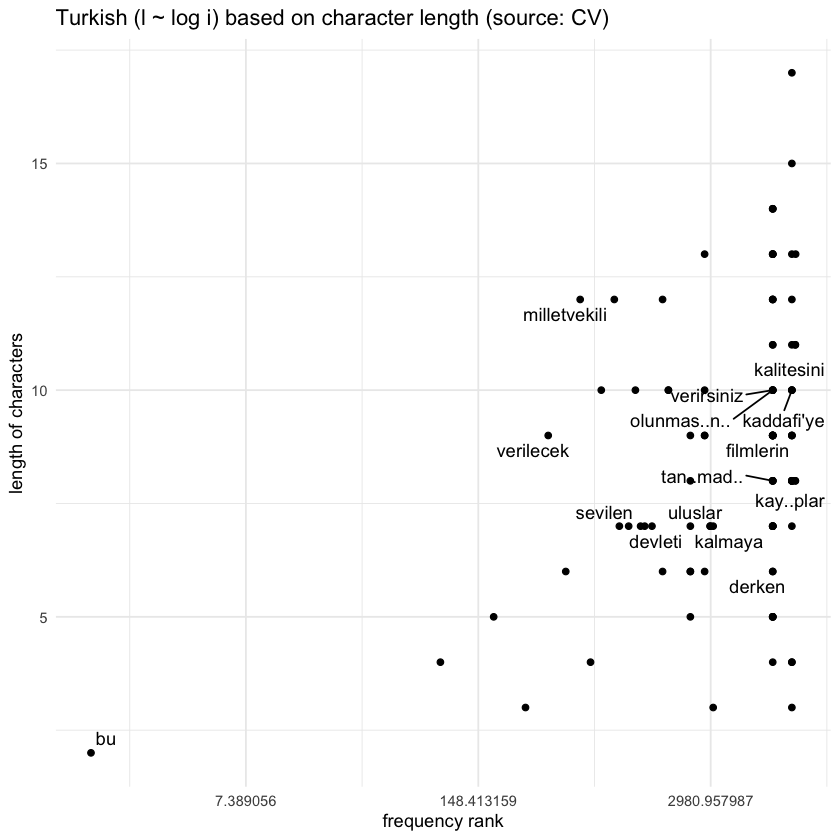

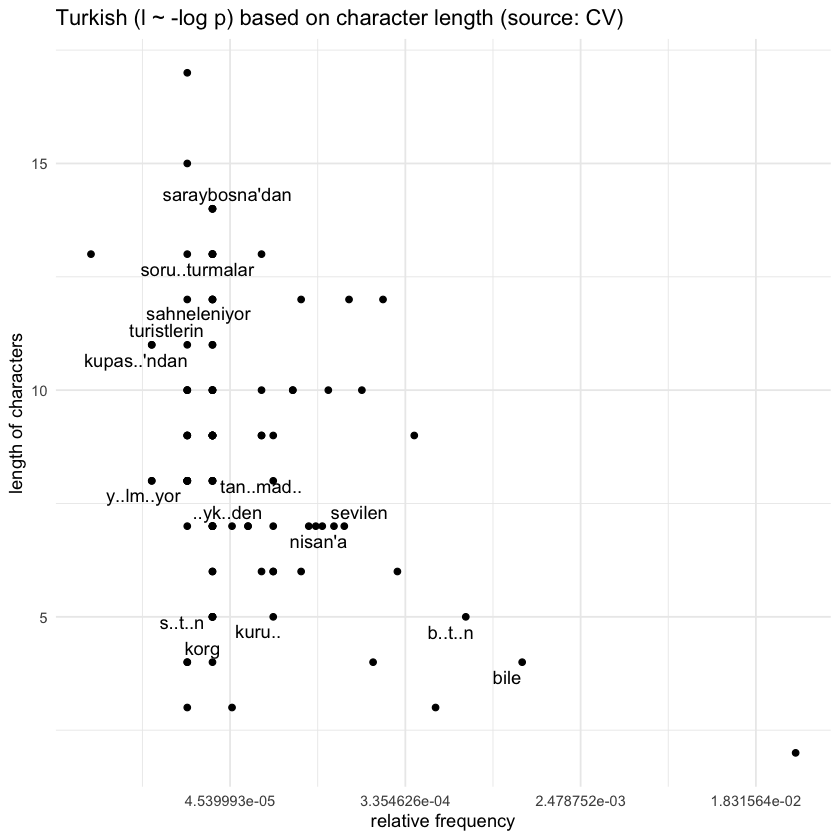

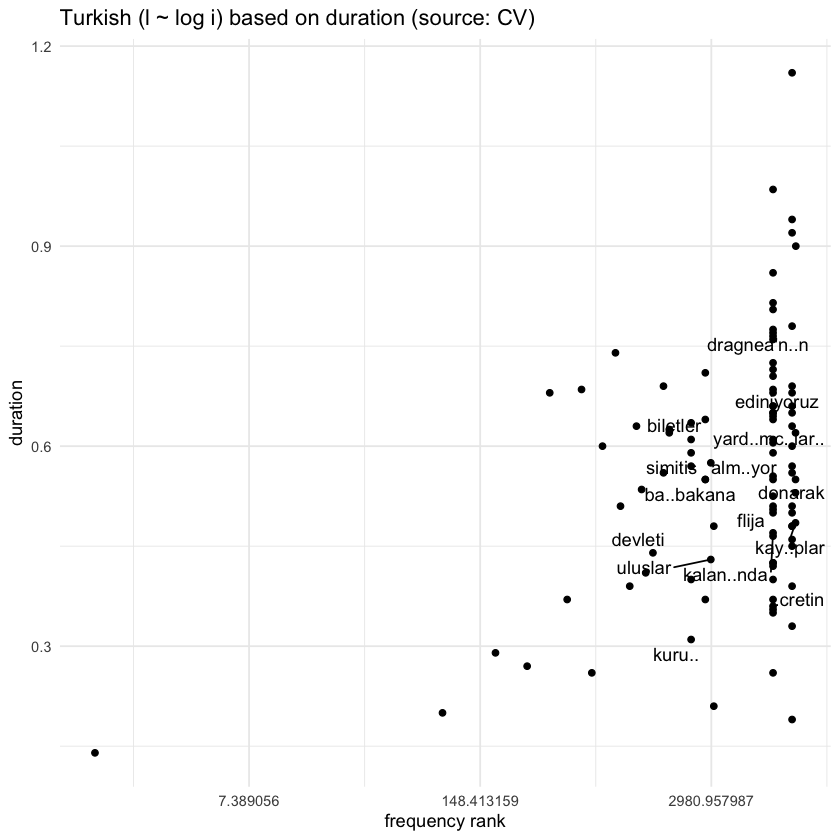

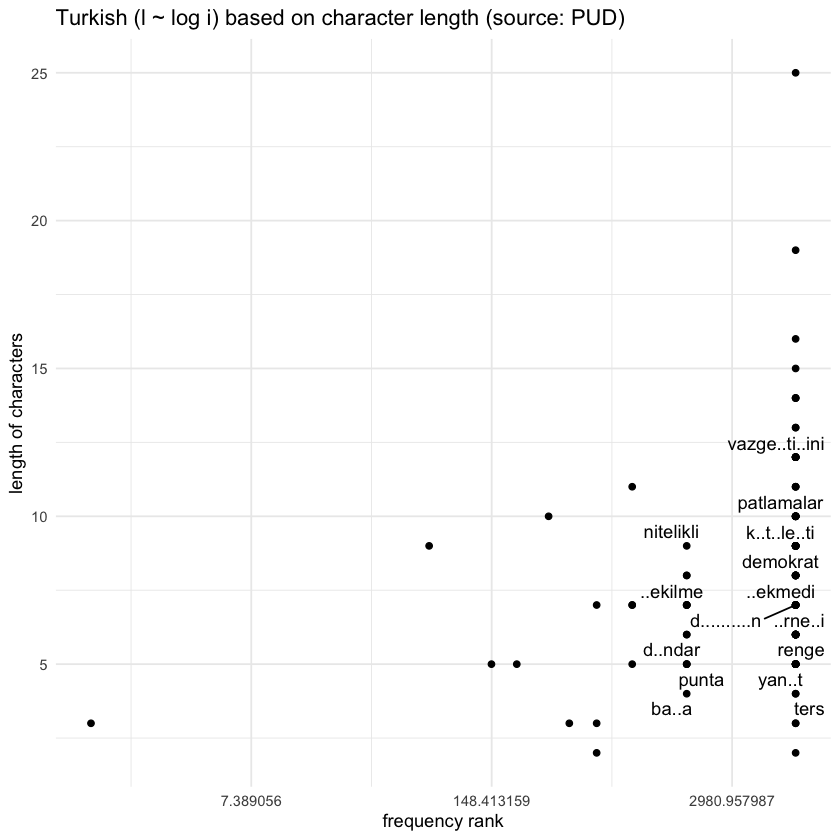

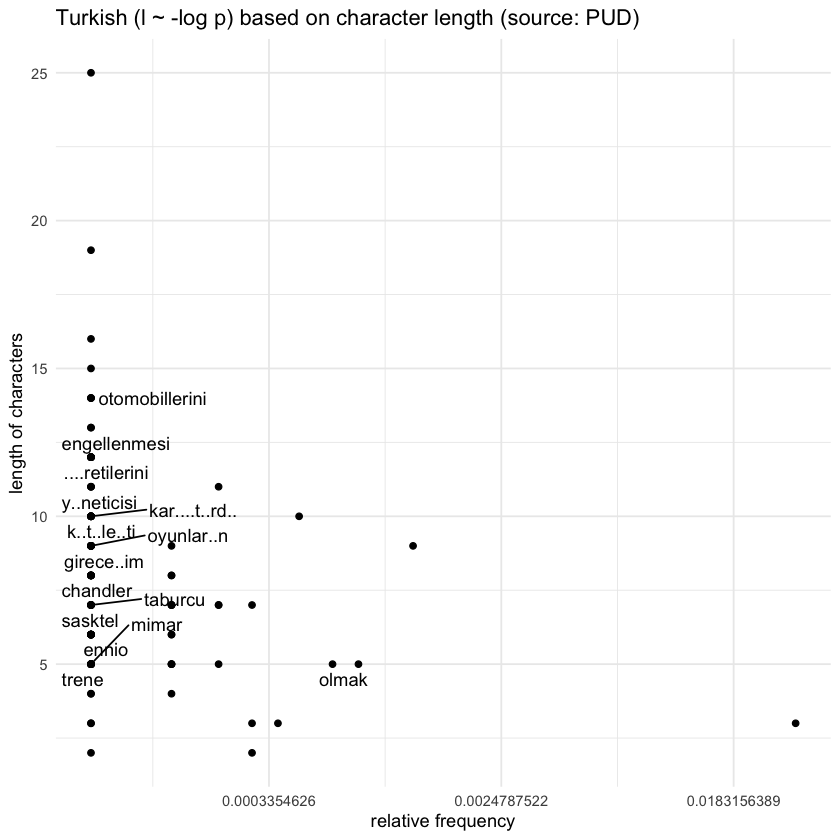

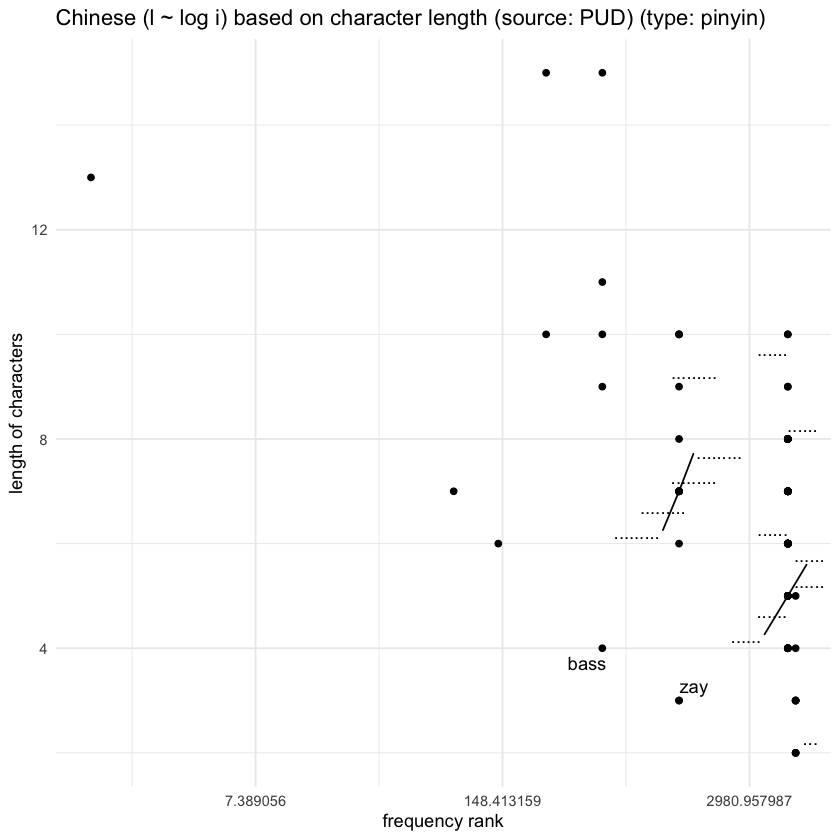

Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


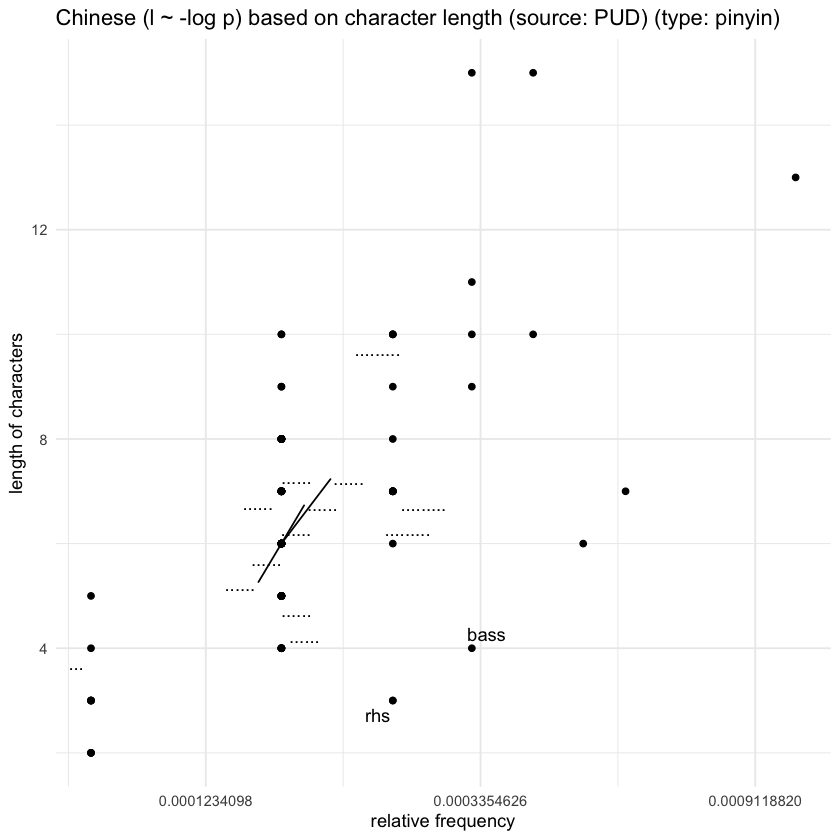

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


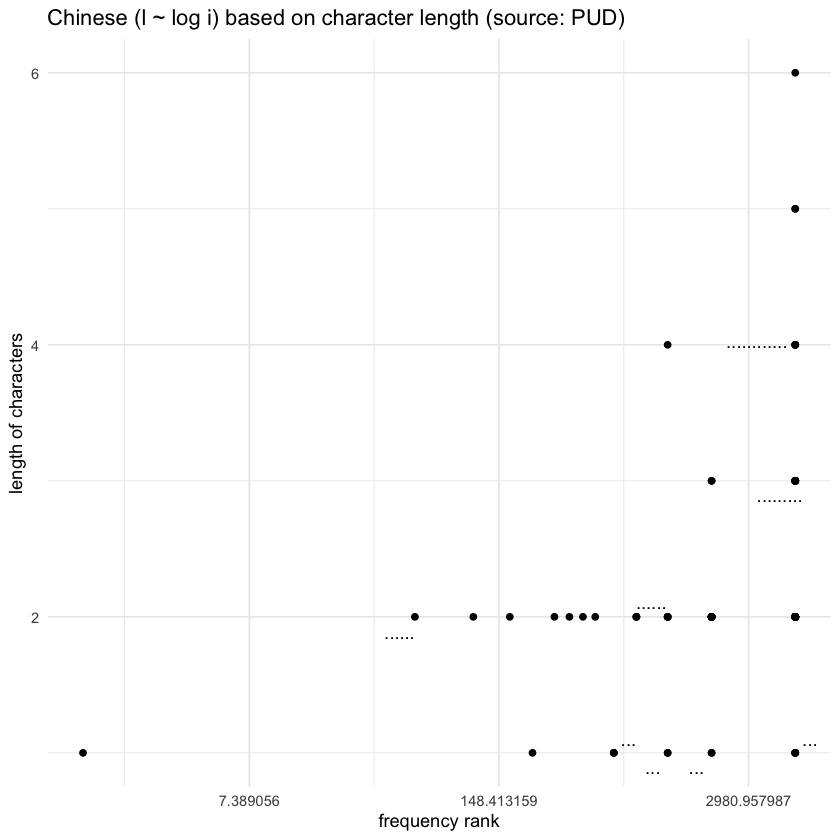

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


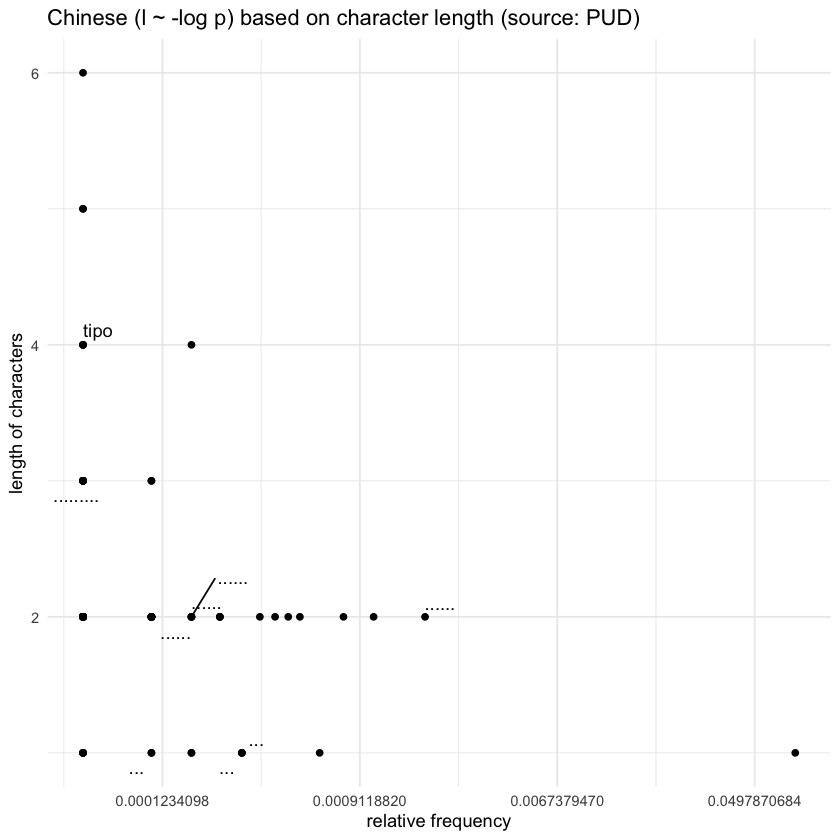

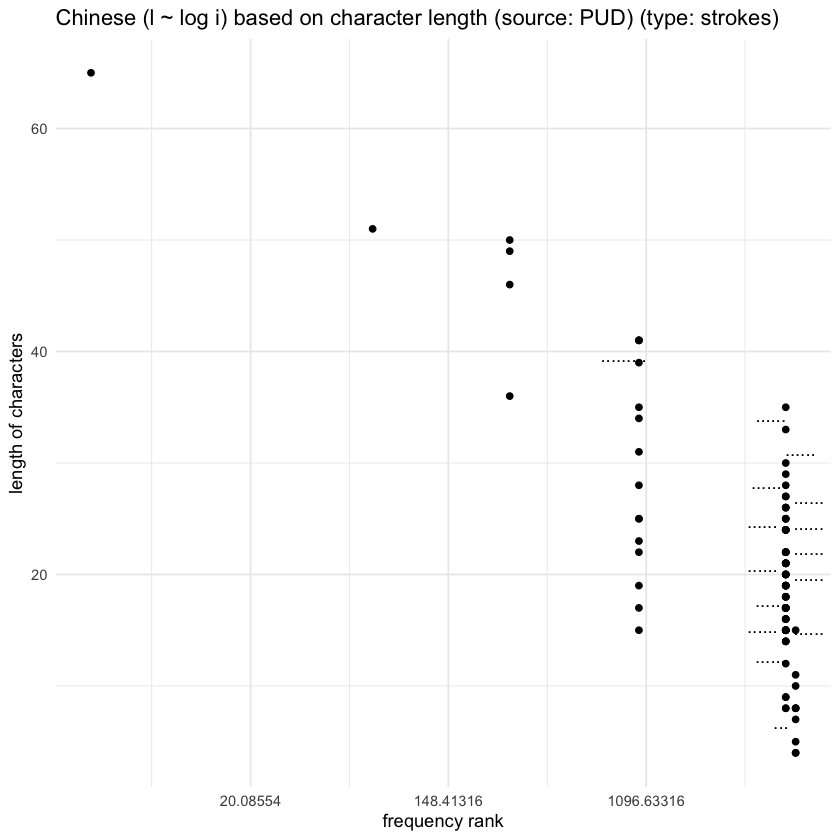

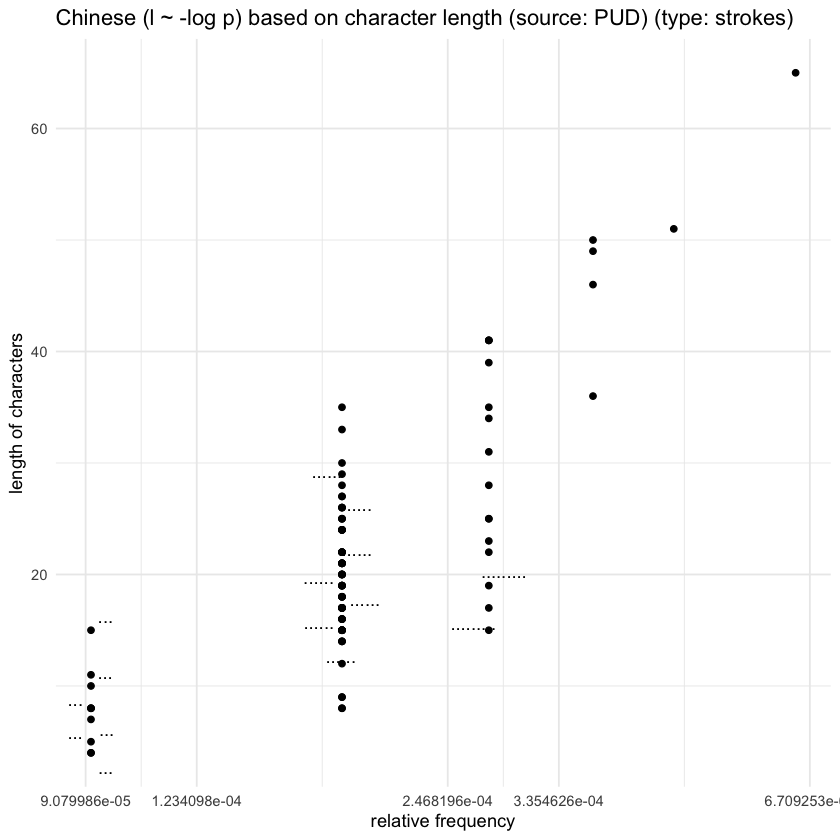

In [12]:
library(ggplot2)
library(ggrepel)

process_data <- function(data, xLabel, yLabel, title){
    n_rows <- nrow(data)
    indices <- round(seq(1, n_rows, length.out = 100))
    data_subset <- data[indices, ]
    label_data <- data_subset[sample(nrow(data_subset), 15), ]

    p <- ggplot(data_subset, aes(x=x, y=y)) +
        geom_point() +
        geom_text_repel(data=label_data, aes(label=word)) +
        scale_x_continuous(trans='log') +
        labs(x=xLabel, y=yLabel, title=title) +
        theme_minimal()

    print(p)
}

languages_data <- read.csv("../data/languages.csv",sep=";")

get_language <- function(code){
    return(languages_data[languages_data$Code == code,])
}

csv_files <- list.files(path="../data/preprocessed",pattern = ".*.csv$")
for (file in csv_files){
    preprocessed_data <- read.csv(paste("../data/preprocessed/",file,sep=""))
    
    filename <- sub("\\.csv$", "", file)
    filename_parts <- strsplit(filename, "_")[[1]]
    language_code <- filename_parts[1]
    source <- toupper(filename_parts[2])
    type <- ""
    if (length(filename_parts) >= 3){
        type <- filename_parts[2]
        source <- toupper(filename_parts[3])
    }

    language <- get_language(language_code)

    data <- data.frame(
        x = preprocessed_data$Frequency.rank,
        y = preprocessed_data$Length.of.characters,
        word = preprocessed_data$Word
    )

    title <- paste(language$Language, "(l ~ log i) based on character length", paste("(source: ", source, ")", sep=""))
    if (type != ""){
        title <- paste(language$Language, "(l ~ log i) based on character length", paste("(source: ", source, ") (type: ", type, ")", sep=""))
    }

    process_data(data, "frequency rank", "length of characters", title)

    data <- data.frame(
        x = preprocessed_data$Relative.frequency,
        y = preprocessed_data$Length.of.characters,
        word = preprocessed_data$Word
    )

    title <- paste(language$Language, "(l ~ -log p) based on character length", paste("(source: ", source, ")", sep=""))
    if (type != ""){
        title <- paste(language$Language, "(l ~ -log p) based on character length", paste("(source: ", source, ") (type: ", type, ")", sep=""))
    }

    process_data(data, "relative frequency", "length of characters", title)


    # Analysis based on duration
    if (!("Median.duration" %in% names(preprocessed_data))) {
        next
    }

    data <- data.frame(
        x = preprocessed_data$Frequency.rank,
        y = preprocessed_data$Median.duration,
        word = preprocessed_data$Word
    )

    title <- paste(language$Language, "(l ~ log i) based on duration", paste("(source: ", source, ")", sep=""))
    if (type != ""){
        title <- paste(language$Language, "(l ~ log i) based on duration", paste("(source: ", source, ") (type: ", type, ")", sep=""))
    }

    process_data(data, "frequency rank", "duration", title)
}